In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [4]:
from google.colab import files
uploaded = files.upload()

Saving diabetes[1].csv to diabetes[1].csv


In [5]:
# Assuming your file is called 'data.csv'
df = pd.read_csv('diabetes[1].csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 10 rows:")
print(df.head(10))

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nTarget variable distribution:")
print(df['Outcome'].value_counts())

Dataset Shape: (768, 9)

First 10 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32   

In [7]:
# Check for zeros in features that shouldn't have zero values
features_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Rows with zero values in important features:")
for feature in features_to_check:
    zero_count = (df[feature] == 0).sum()
    print(f"{feature}: {zero_count} zeros ({zero_count/len(df)*100:.2f}%)")

# Replace zeros with NaN for appropriate features
features_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_clean = df.copy()
for feature in features_with_zeros:
    df_clean[feature] = df_clean[feature].replace(0, np.nan)

print("\nMissing values after replacing zeros:")
print(df_clean.isnull().sum())

# Impute missing values
imputer = SimpleImputer(strategy='median')
df_clean[features_with_zeros] = imputer.fit_transform(df_clean[features_with_zeros])

print("\nMissing values after imputation:")
print(df_clean.isnull().sum())

Rows with zero values in important features:
Glucose: 5 zeros (0.65%)
BloodPressure: 35 zeros (4.56%)
SkinThickness: 227 zeros (29.56%)
Insulin: 374 zeros (48.70%)
BMI: 11 zeros (1.43%)

Missing values after replacing zeros:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Missing values after imputation:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


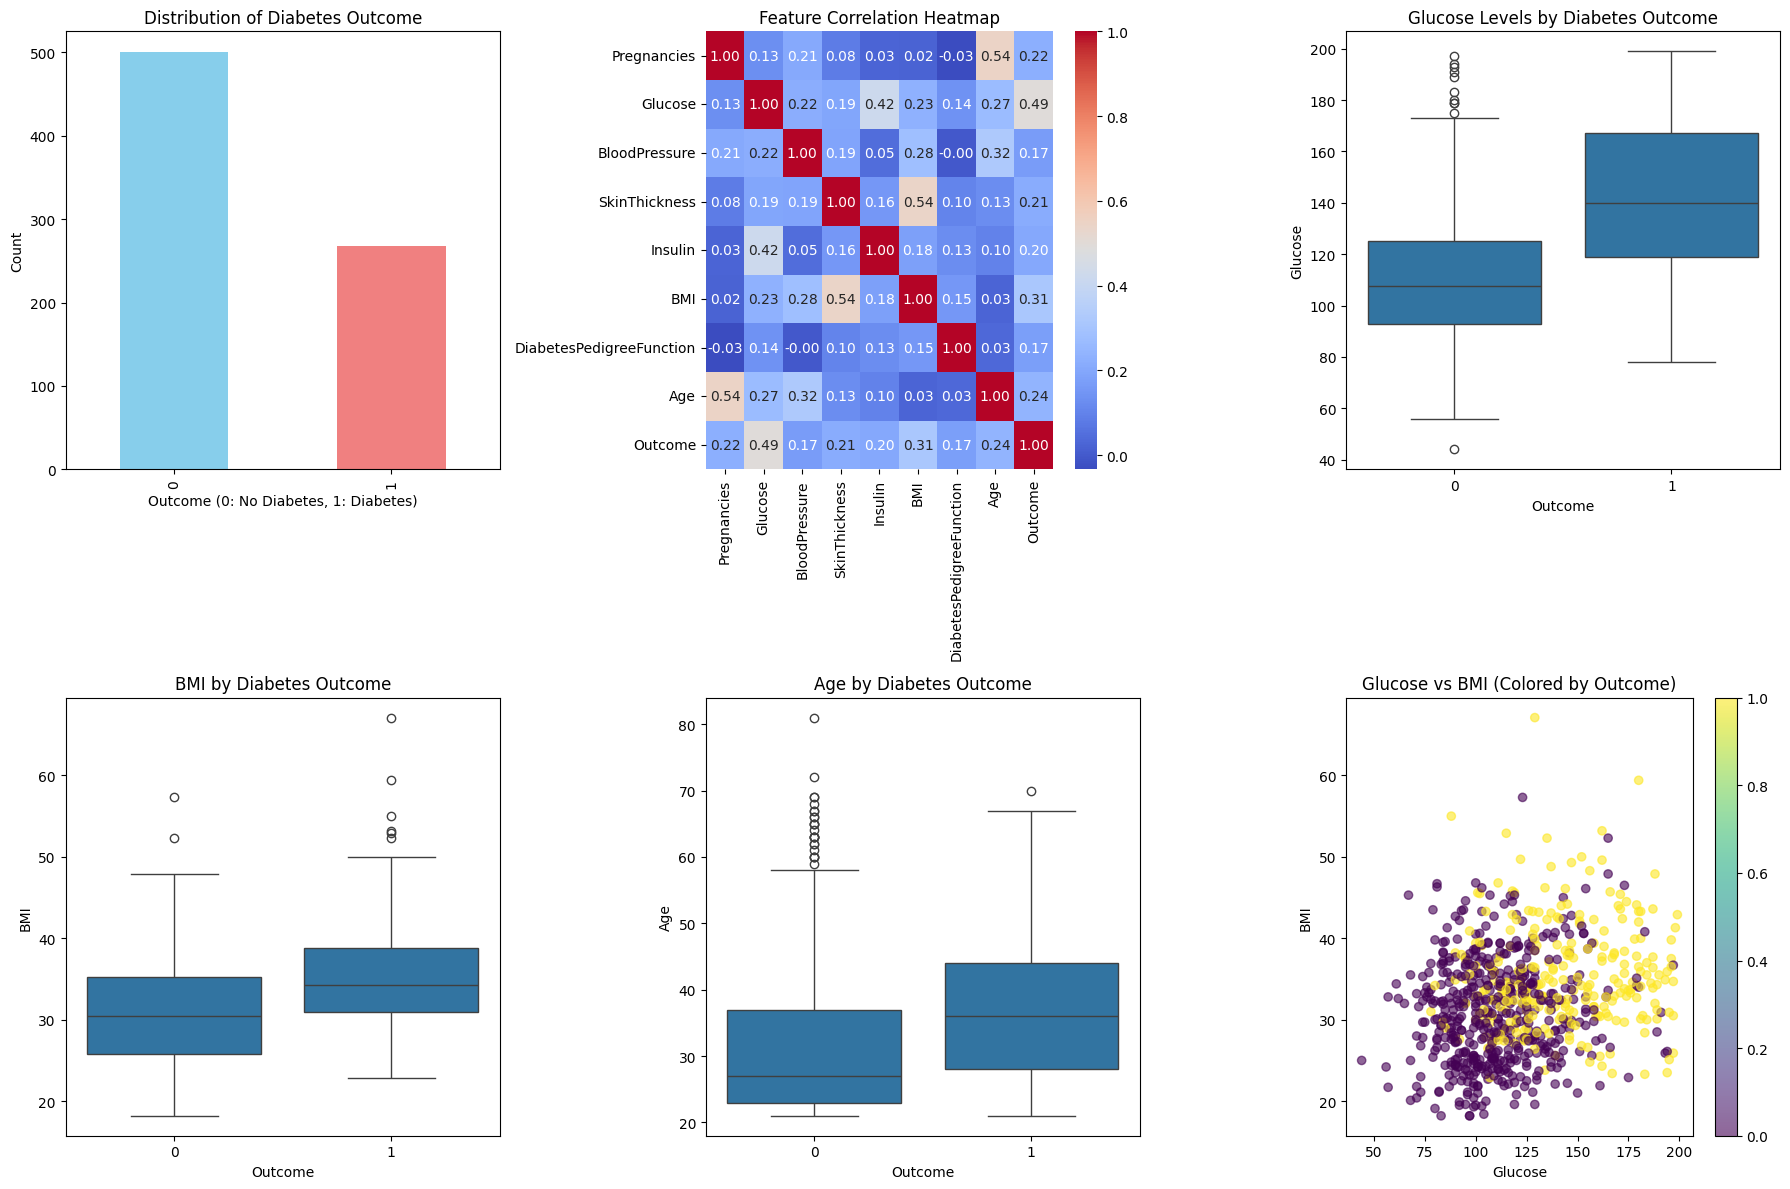

Correlation with Outcome:
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312038
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.214873
Insulin                     0.203790
DiabetesPedigreeFunction    0.173844
BloodPressure               0.165723
Name: Outcome, dtype: float64


In [8]:
# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution of target variable
df_clean['Outcome'].value_counts().plot(kind='bar', ax=axes[0,0], color=['skyblue', 'lightcoral'])
axes[0,0].set_title('Distribution of Diabetes Outcome')
axes[0,0].set_xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
axes[0,0].set_ylabel('Count')

# 2. Correlation heatmap
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[0,1], fmt='.2f')
axes[0,1].set_title('Feature Correlation Heatmap')

# 3. Distribution of Glucose by Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df_clean, ax=axes[0,2])
axes[0,2].set_title('Glucose Levels by Diabetes Outcome')

# 4. Distribution of BMI by Outcome
sns.boxplot(x='Outcome', y='BMI', data=df_clean, ax=axes[1,0])
axes[1,0].set_title('BMI by Diabetes Outcome')

# 5. Age distribution by Outcome
sns.boxplot(x='Outcome', y='Age', data=df_clean, ax=axes[1,1])
axes[1,1].set_title('Age by Diabetes Outcome')

# 6. Scatter plot: Glucose vs BMI colored by Outcome
scatter = axes[1,2].scatter(df_clean['Glucose'], df_clean['BMI'], c=df_clean['Outcome'],
                           alpha=0.6, cmap='viridis')
axes[1,2].set_xlabel('Glucose')
axes[1,2].set_ylabel('BMI')
axes[1,2].set_title('Glucose vs BMI (Colored by Outcome)')
plt.colorbar(scatter, ax=axes[1,2])

plt.tight_layout()
plt.show()

# Display correlation with Outcome
print("Correlation with Outcome:")
correlation_with_outcome = correlation_matrix['Outcome'].sort_values(ascending=False)
print(correlation_with_outcome)

In [9]:
# For linear regression, we'll predict a continuous variable
# Since we have binary outcome, let's create a synthetic continuous target
# We can use Glucose level as target since it's highly correlated with diabetes
# Alternatively, we can create a risk score

# Option 1: Use Glucose as target (continuous variable)
X = df_clean.drop(['Glucose', 'Outcome'], axis=1)  # Features
y = df_clean['Glucose']  # Target (continuous)

print("Feature names:", list(X.columns))
print("Target variable: Glucose Levels")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeature scaling completed!")

Feature names: ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target variable: Glucose Levels

Training set size: (614, 7)
Testing set size: (154, 7)

Feature scaling completed!


In [10]:
# Create and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance (by coefficient magnitude):")
print(feature_importance)

Model training completed!
Model coefficients: [ 0.16980773  2.5251577  -1.62711193 10.80739162  4.67691615  2.26636431
  6.4091596 ]
Model intercept: 121.8078

Feature Importance (by coefficient magnitude):
                    Feature  Coefficient
3                   Insulin    10.807392
6                       Age     6.409160
4                       BMI     4.676916
1             BloodPressure     2.525158
5  DiabetesPedigreeFunction     2.266364
2             SkinThickness    -1.627112
0               Pregnancies     0.169808


In [11]:
# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Display some actual vs predicted values
results_df = pd.DataFrame({
    'Actual_Glucose': y_test.values,
    'Predicted_Glucose': y_pred,
    'Difference': np.abs(y_test.values - y_pred)
}).head(10)

print("\nSample Predictions vs Actual Values:")
print(results_df.round(2))

# Calculate accuracy within a tolerance range
tolerance = 15  # 15 mg/dL tolerance
within_tolerance = np.sum(np.abs(y_test.values - y_pred) <= tolerance)
accuracy_within_tolerance = within_tolerance / len(y_test) * 100
print(f"\nAccuracy within {tolerance} mg/dL tolerance: {accuracy_within_tolerance:.2f}%")

Model Evaluation Metrics:
Mean Squared Error (MSE): 766.9533
Root Mean Squared Error (RMSE): 27.6939
Mean Absolute Error (MAE): 22.3321
R-squared (R²): 0.2379

Sample Predictions vs Actual Values:
   Actual_Glucose  Predicted_Glucose  Difference
0            98.0             130.67       32.67
1           112.0             113.22        1.22
2           108.0             108.26        0.26
3           107.0             119.68       12.68
4           136.0             129.86        6.14
5           103.0             142.26       39.26
6            71.0              95.64       24.64
7           117.0             129.89       12.89
8           154.0             120.63       33.37
9           147.0             138.24        8.76

Accuracy within 15 mg/dL tolerance: 40.91%


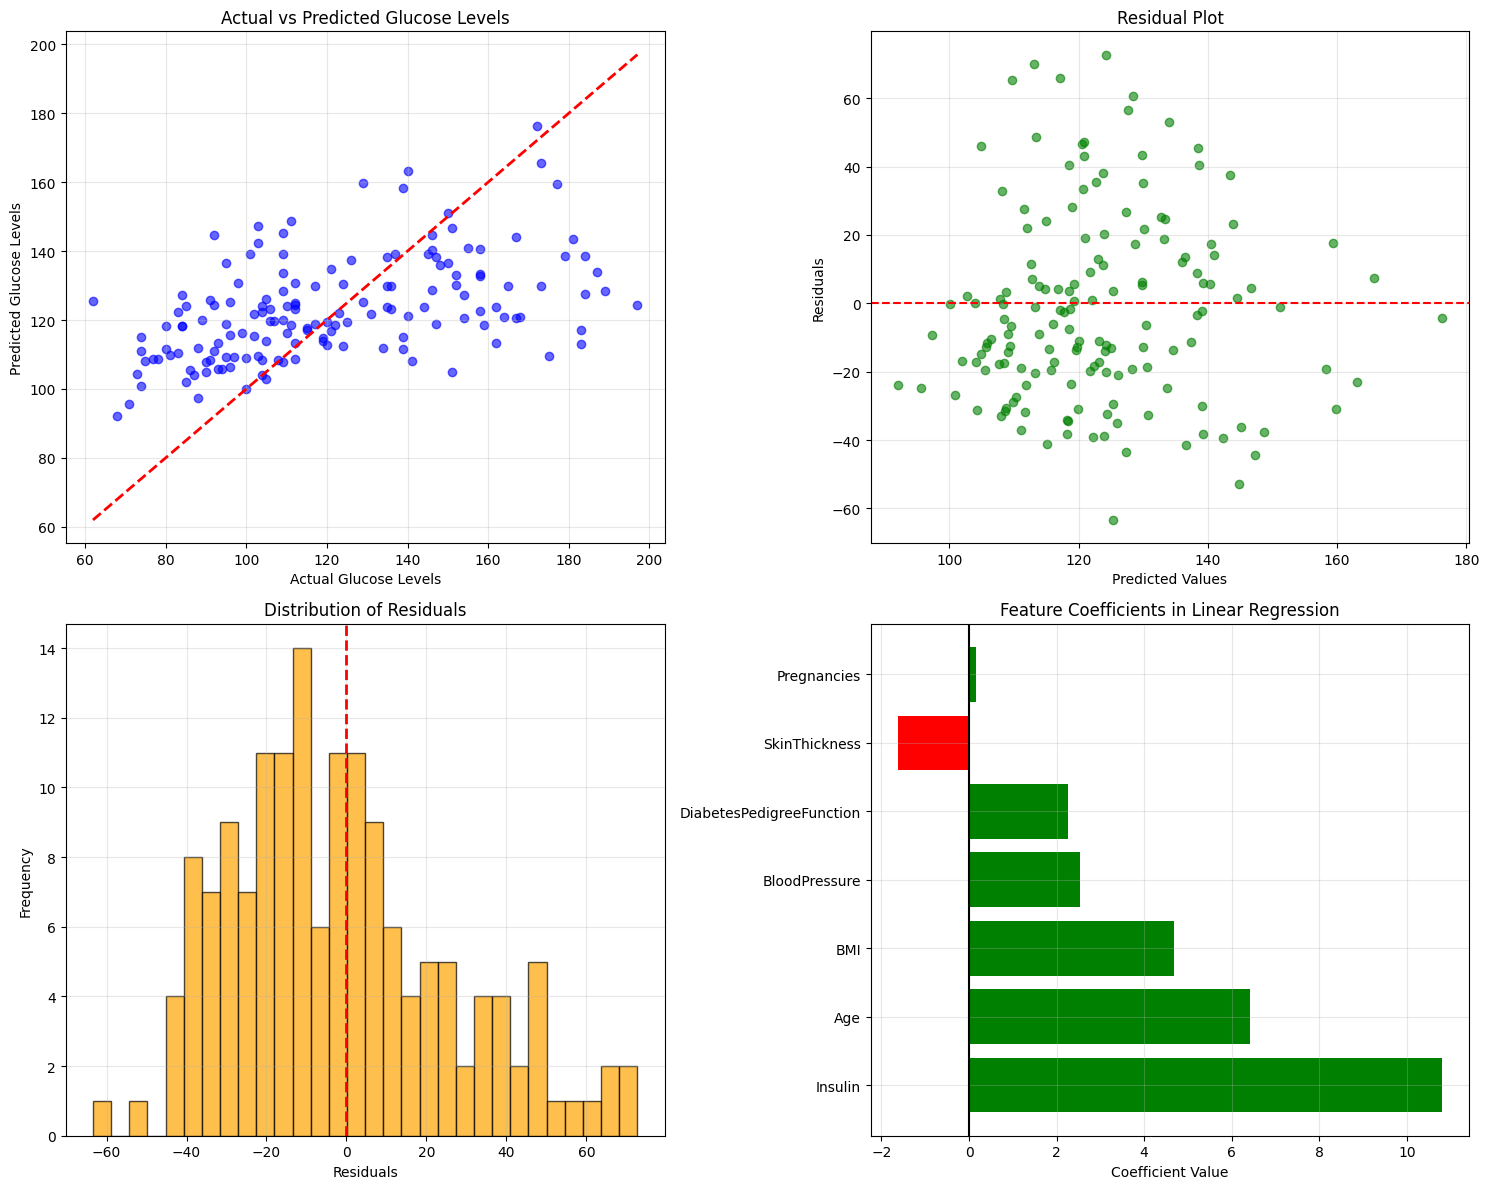

In [12]:
# Create visualization plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Actual vs Predicted values scatter plot
axes[0,0].scatter(y_test, y_pred, alpha=0.6, color='blue')
axes[0,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0,0].set_xlabel('Actual Glucose Levels')
axes[0,0].set_ylabel('Predicted Glucose Levels')
axes[0,0].set_title('Actual vs Predicted Glucose Levels')
axes[0,0].grid(True, alpha=0.3)

# 2. Residual plot
residuals = y_test - y_pred
axes[0,1].scatter(y_pred, residuals, alpha=0.6, color='green')
axes[0,1].axhline(y=0, color='r', linestyle='--')
axes[0,1].set_xlabel('Predicted Values')
axes[0,1].set_ylabel('Residuals')
axes[0,1].set_title('Residual Plot')
axes[0,1].grid(True, alpha=0.3)

# 3. Distribution of residuals
axes[1,0].hist(residuals, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[1,0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[1,0].set_xlabel('Residuals')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Residuals')
axes[1,0].grid(True, alpha=0.3)

# 4. Feature coefficients
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
axes[1,1].barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors)
axes[1,1].set_xlabel('Coefficient Value')
axes[1,1].set_title('Feature Coefficients in Linear Regression')
axes[1,1].axvline(x=0, color='black', linestyle='-')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Function to make predictions on new data
def predict_glucose_level(model, scaler, features):
    """
    Predict glucose level based on input features
    features should be in order: ['Pregnancies', 'BloodPressure', 'SkinThickness',
                                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
    """
    # Scale the features
    features_scaled = scaler.transform([features])

    # Make prediction
    prediction = model.predict(features_scaled)[0]

    return prediction

# Example prediction 1: Typical non-diabetic patient
typical_patient = [
    2,      # Pregnancies
    72,     # BloodPressure
    23,     # SkinThickness
    80,     # Insulin
    25.5,   # BMI
    0.3,    # DiabetesPedigreeFunction
    35      # Age
]

predicted_glucose_1 = predict_glucose_level(model, scaler, typical_patient)
print(f"Predicted glucose level for typical patient: {predicted_glucose_1:.2f} mg/dL")

# Example prediction 2: Higher risk patient
high_risk_patient = [
    5,      # Pregnancies
    85,     # BloodPressure
    35,     # SkinThickness
    180,    # Insulin
    32.0,   # BMI
    0.8,    # DiabetesPedigreeFunction
    50      # Age
]

predicted_glucose_2 = predict_glucose_level(model, scaler, high_risk_patient)
print(f"Predicted glucose level for high-risk patient: {predicted_glucose_2:.2f} mg/dL")

# Compare with actual values from test set
print(f"\nSample actual glucose from test set: {y_test.iloc[0]:.2f} mg/dL")
print(f"Predicted glucose for same patient: {y_pred[0]:.2f} mg/dL")

Predicted glucose level for typical patient: 110.76 mg/dL
Predicted glucose level for high-risk patient: 139.69 mg/dL

Sample actual glucose from test set: 98.00 mg/dL
Predicted glucose for same patient: 130.67 mg/dL


In [14]:
print("="*60)
print("LINEAR REGRESSION MODEL SUMMARY - DIABETES DATASET")
print("="*60)
print(f"Dataset: Diabetes ({df_clean.shape[0]} samples, {X.shape[1]} features)")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"R-squared Score: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f} mg/dL")
print(f"Mean Absolute Error: {mae:.4f} mg/dL")
print(f"Accuracy within {tolerance} mg/dL tolerance: {accuracy_within_tolerance:.2f}%")

print("\nModel Equation:")
equation = f"Glucose = {model.intercept_:.4f}"
for i, (feature, coef) in enumerate(zip(X.columns, model.coef_)):
    sign = '+' if coef >= 0 else ''
    equation += f" {sign} {coef:.4f}*{feature}"
print(equation)

print("\nKey Insights:")
print("1. Positive coefficients indicate features that increase glucose levels")
print("2. Negative coefficients indicate features that decrease glucose levels")
print("3. R² shows how well the model explains variance in glucose levels")
print("4. Features are scaled, so coefficient magnitude indicates importance")

print("\nMost Important Features (by coefficient magnitude):")
print(feature_importance.head(10))

LINEAR REGRESSION MODEL SUMMARY - DIABETES DATASET
Dataset: Diabetes (768 samples, 7 features)
Training samples: 614
Testing samples: 154
R-squared Score: 0.2379
Root Mean Squared Error: 27.6939 mg/dL
Mean Absolute Error: 22.3321 mg/dL
Accuracy within 15 mg/dL tolerance: 40.91%

Model Equation:
Glucose = 121.8078 + 0.1698*Pregnancies + 2.5252*BloodPressure  -1.6271*SkinThickness + 10.8074*Insulin + 4.6769*BMI + 2.2664*DiabetesPedigreeFunction + 6.4092*Age

Key Insights:
1. Positive coefficients indicate features that increase glucose levels
2. Negative coefficients indicate features that decrease glucose levels
3. R² shows how well the model explains variance in glucose levels
4. Features are scaled, so coefficient magnitude indicates importance

Most Important Features (by coefficient magnitude):
                    Feature  Coefficient
3                   Insulin    10.807392
6                       Age     6.409160
4                       BMI     4.676916
1             BloodPressure

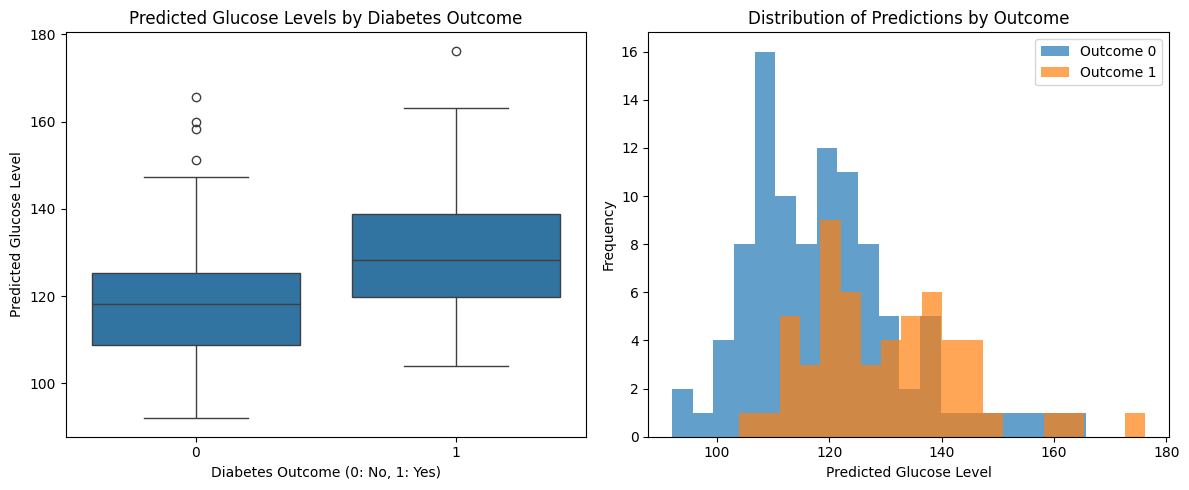


Average Predicted Glucose by Diabetes Outcome:
Actual_Outcome
0    119.287683
1    129.966699
Name: Predicted_Glucose, dtype: float64


In [15]:
# Let's also see how our glucose predictions relate to the actual diabetes outcomes
plt.figure(figsize=(12, 5))

# Plot 1: Predicted glucose vs actual outcome
plt.subplot(1, 2, 1)
sns.boxplot(x=df_clean.loc[y_test.index, 'Outcome'], y=y_pred)
plt.title('Predicted Glucose Levels by Diabetes Outcome')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Predicted Glucose Level')

# Plot 2: Distribution of predictions for each outcome
plt.subplot(1, 2, 2)
for outcome in [0, 1]:
    plt.hist(y_pred[df_clean.loc[y_test.index, 'Outcome'] == outcome],
             alpha=0.7, label=f'Outcome {outcome}', bins=20)
plt.xlabel('Predicted Glucose Level')
plt.ylabel('Frequency')
plt.title('Distribution of Predictions by Outcome')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate average predicted glucose by outcome
avg_glucose_by_outcome = pd.DataFrame({
    'Actual_Outcome': df_clean.loc[y_test.index, 'Outcome'],
    'Predicted_Glucose': y_pred
}).groupby('Actual_Outcome')['Predicted_Glucose'].mean()

print("\nAverage Predicted Glucose by Diabetes Outcome:")
print(avg_glucose_by_outcome)